# Housing Roulette

## Authors
### Brian Yoon, Harut Lementsyan, Tatiana Adams, Vintina Hanna


# Introduction
In the real estate market, determining the factors that significantly influence housing prices is crucial for buyers, sellers, and real estate professionals. Our project aims to identify and analyze the key features that impact housing prices, such as the number of bedrooms, the neighborhood, square footage, and other significant attributes.

## Description of Source Data Set
The dataset chosen for this project is named “Housing Price Prediction Data,” which is available on Kaggle at the following link: Housing Price Prediction Data. This dataset provides comprehensive information on various attributes of houses, including square footage, the number of bedrooms, the number of bathrooms, the neighborhood in which the property is located, the year it was built, and the price of the property.

## What You Will Predict
In this project we will identify the key factors that directly affect housing prices. We expect to uncover several specific trends. We predict a direct correlation between the square footage of a house and its price, where larger homes are likely to result in higher prices. We also believe there will be a direct link between the housing price and the number of bedrooms and bathrooms. With new housing developments we believe we will see a trend between the age of the house and price due to newer homes being built with modern construction standards and appliances. As each feature may have its own impact on the price we believe a combination of factors can drastically affect the price of a home. For instance a house that is located in a rural area that has a square footage over 2396 sqft may actually be less expensive than a house in an urban area with the same square footage

## Features Used as Predictors
To determine our feature we are going to use the following features:
* SquareFeet -  this feature stores the Square Feet of the house and holds numerical data
* Bedrooms - this feature stores the number of bedrooms in the house and holds numerical data
* Bathrooms - this feature stores the number of bathrooms in the house and holds numerical data
* Neighborhood - this feature stores the area the house is located and holds categorical data
* YearBuilt - this feature stores the year the house was built and holds numerical data
* Price - this feature the price of the house and holds numerical data


# Preliminary Work on Data Preparation

In [1]:
# Import statements
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Constants
NUMERICAL_PREDICTORS = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt']
PREDICTORS = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'Neighborhood_Rural', 'Neighborhood_Suburb', 'Neighborhood_Urban']
TARGET = 'Price'
URL = 'https://raw.githubusercontent.com/supersaiyoon/cst-383-final-group-project/main/housing_price_dataset.csv'

In [3]:
df = pd.read_csv(URL)

In [4]:
# Preview of raw data
df.info()
print()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB



,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239100


In [5]:
# Check for null values
df.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [6]:
# One hot encoding for Neighborhood column
df = pd.get_dummies(df, columns=['Neighborhood'])
df = df.astype(int)
print(df.head())

   SquareFeet  Bedrooms  Bathrooms  YearBuilt   Price  Neighborhood_Rural  \
0        2126         4          1       1969  215355                   1   
1        2459         3          2       1980  195014                   1   
2        1860         2          1       1970  306891                   0   
3        2294         2          1       1996  206786                   0   
4        2130         5          2       2001  272436                   0   

   Neighborhood_Suburb  Neighborhood_Urban  
0                    0                   0  
1                    0                   0  
2                    1                   0  
3                    0                   1  
4                    1                   0  


# Preliminary Work on Data Exploration and Visualization

In [7]:
# Data exploration and visualization code here.
df.head()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
0,2126,4,1,1969,215355,1,0,0
1,2459,3,2,1980,195014,1,0,0
2,1860,2,1,1970,306891,0,1,0
3,2294,2,1,1996,206786,0,0,1
4,2130,5,2,2001,272436,0,1,0


            SquareFeet  Bedrooms  Bathrooms  YearBuilt     Price
SquareFeet    1.000000 -0.002638  -0.003275   0.000482  0.750720
Bedrooms     -0.002638  1.000000   0.007405   0.003147  0.072624
Bathrooms    -0.003275  0.007405   1.000000   0.003748  0.028418
YearBuilt     0.000482  0.003147   0.003748   1.000000 -0.002288
Price         0.750720  0.072624   0.028418  -0.002288  1.000000


<Axes: >

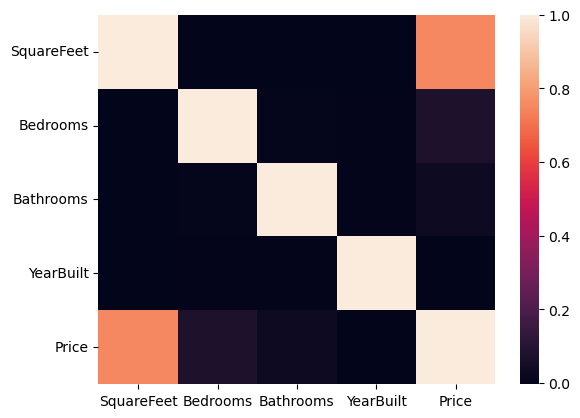

In [8]:
corr = df[NUMERICAL_PREDICTORS + [TARGET]].corr()

print(corr)

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

C:\Users\Brian\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Brian\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Brian\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Brian\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

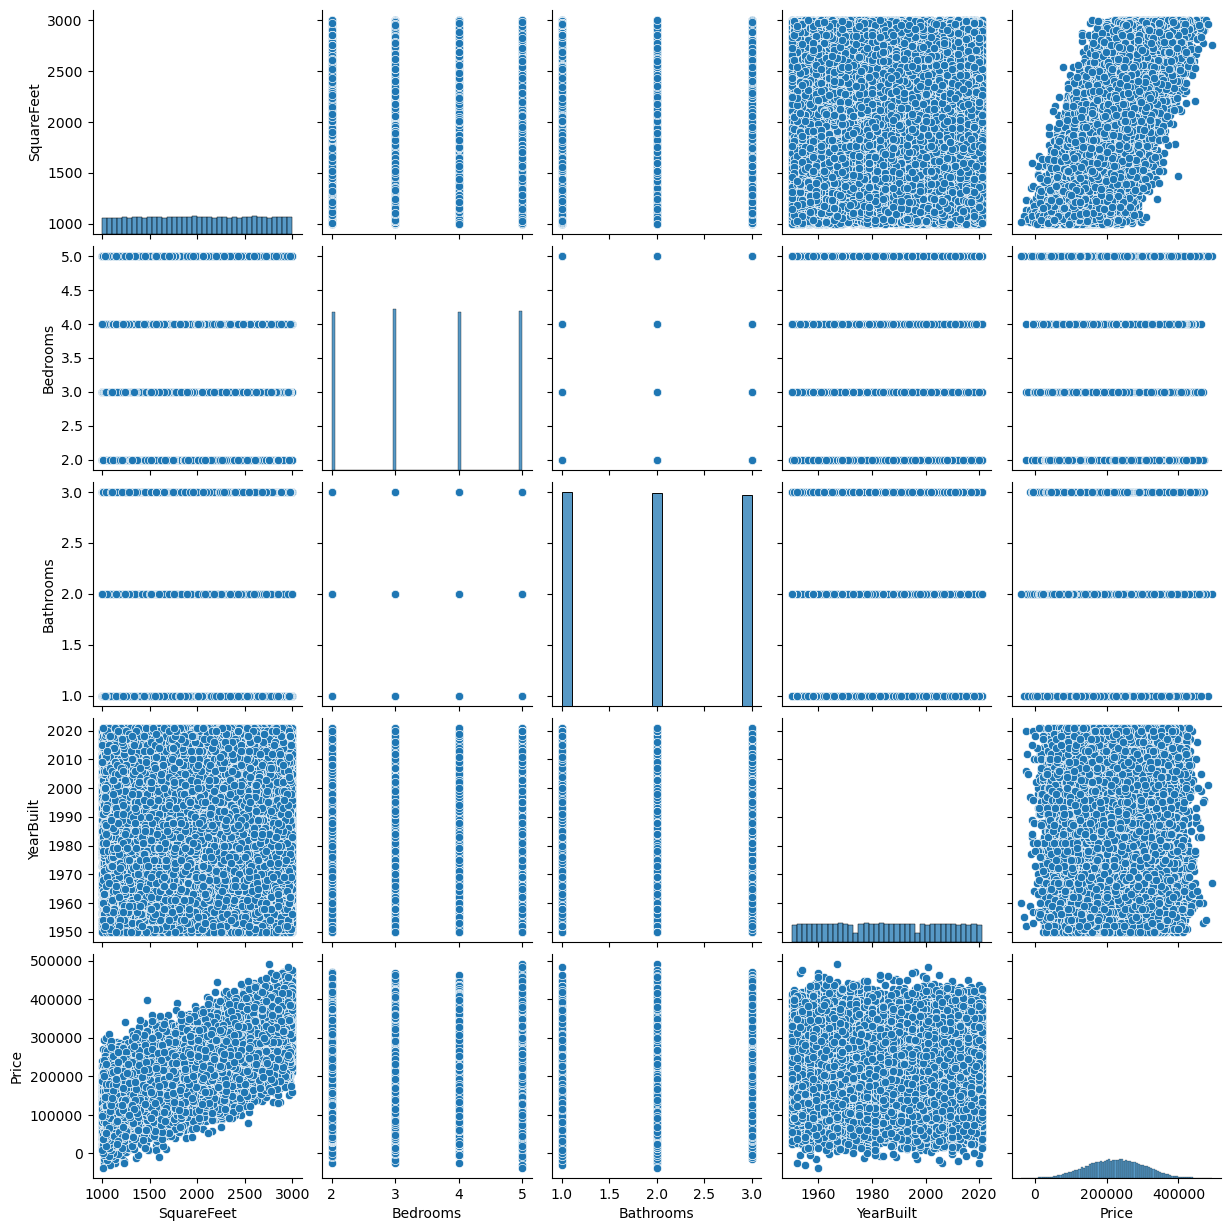

In [9]:
# Create pairplot to look for relationship patterns
sns.pairplot(df[NUMERICAL_PREDICTORS + [TARGET]])
plt.show()

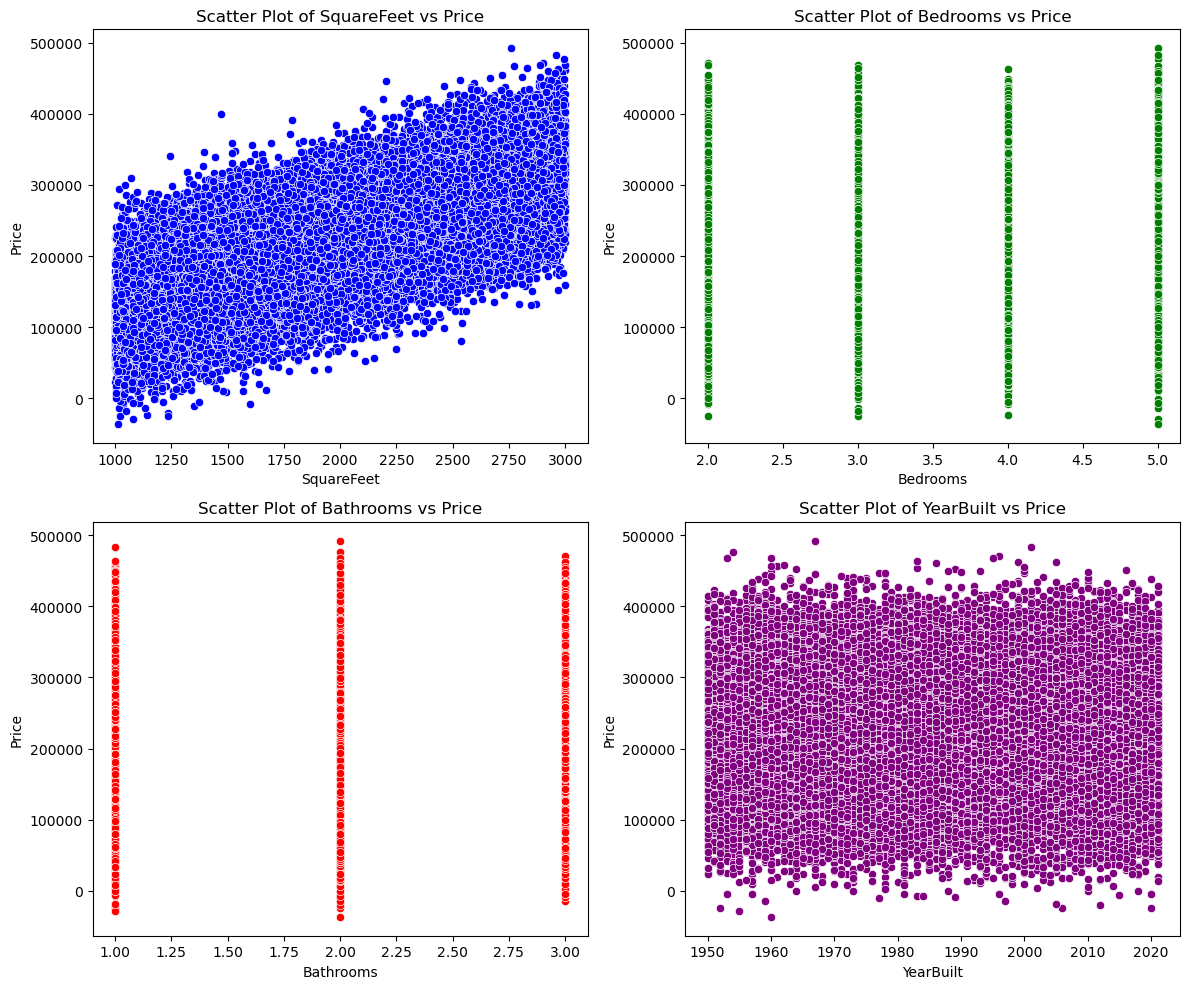

In [10]:
# Scatter Plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()
colors = ['blue', 'green', 'red', 'purple']

for i, col in enumerate(NUMERICAL_PREDICTORS):
    sns.scatterplot(x=df[col], y=df[TARGET], ax=axes[i], color=colors[i])
    axes[i].set_title(f'Scatter Plot of {col} vs {TARGET}')

plt.tight_layout()
plt.show()

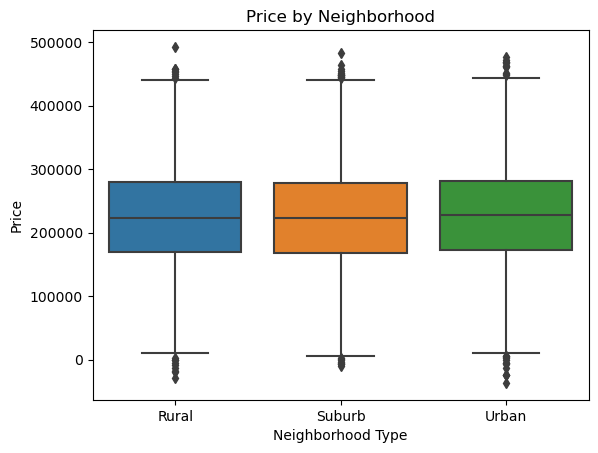

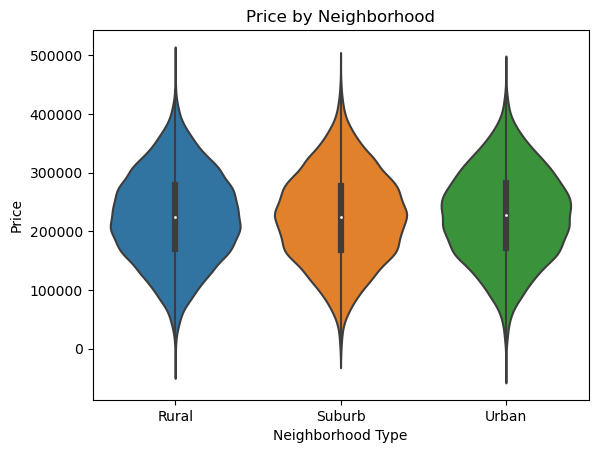

In [11]:
# Boxplot for each neighborhood type
price = df[TARGET]

# Determine neighborhood type
neighborhood_rural = df['Neighborhood_Rural'] == 1
neighborhood_suburb = df['Neighborhood_Suburb'] == 1
neighborhood_urban = df['Neighborhood_Urban'] == 1

# Create new column for neighborhood type
neighborhood = pd.Series(np.where(neighborhood_rural, 'Rural', np.where(neighborhood_suburb, 'Suburb', 'Urban')))

# Combine price and neighborhood type into new DataFrame
neighborhood_df = pd.DataFrame({'Price': price, 'Neighborhood': neighborhood})

# Create boxplot for each neighborhood type
sns.boxplot(x='Neighborhood', y='Price', data=neighborhood_df)
plt.xlabel('Neighborhood Type')
plt.ylabel('Price')
plt.title('Price by Neighborhood')
plt.show()

# Also create violin plot
sns.violinplot(x='Neighborhood', y='Price', data=neighborhood_df)
plt.xlabel('Neighborhood Type')
plt.ylabel('Price')
plt.title('Price by Neighborhood')
plt.show()

C:\Users\Brian\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Brian\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


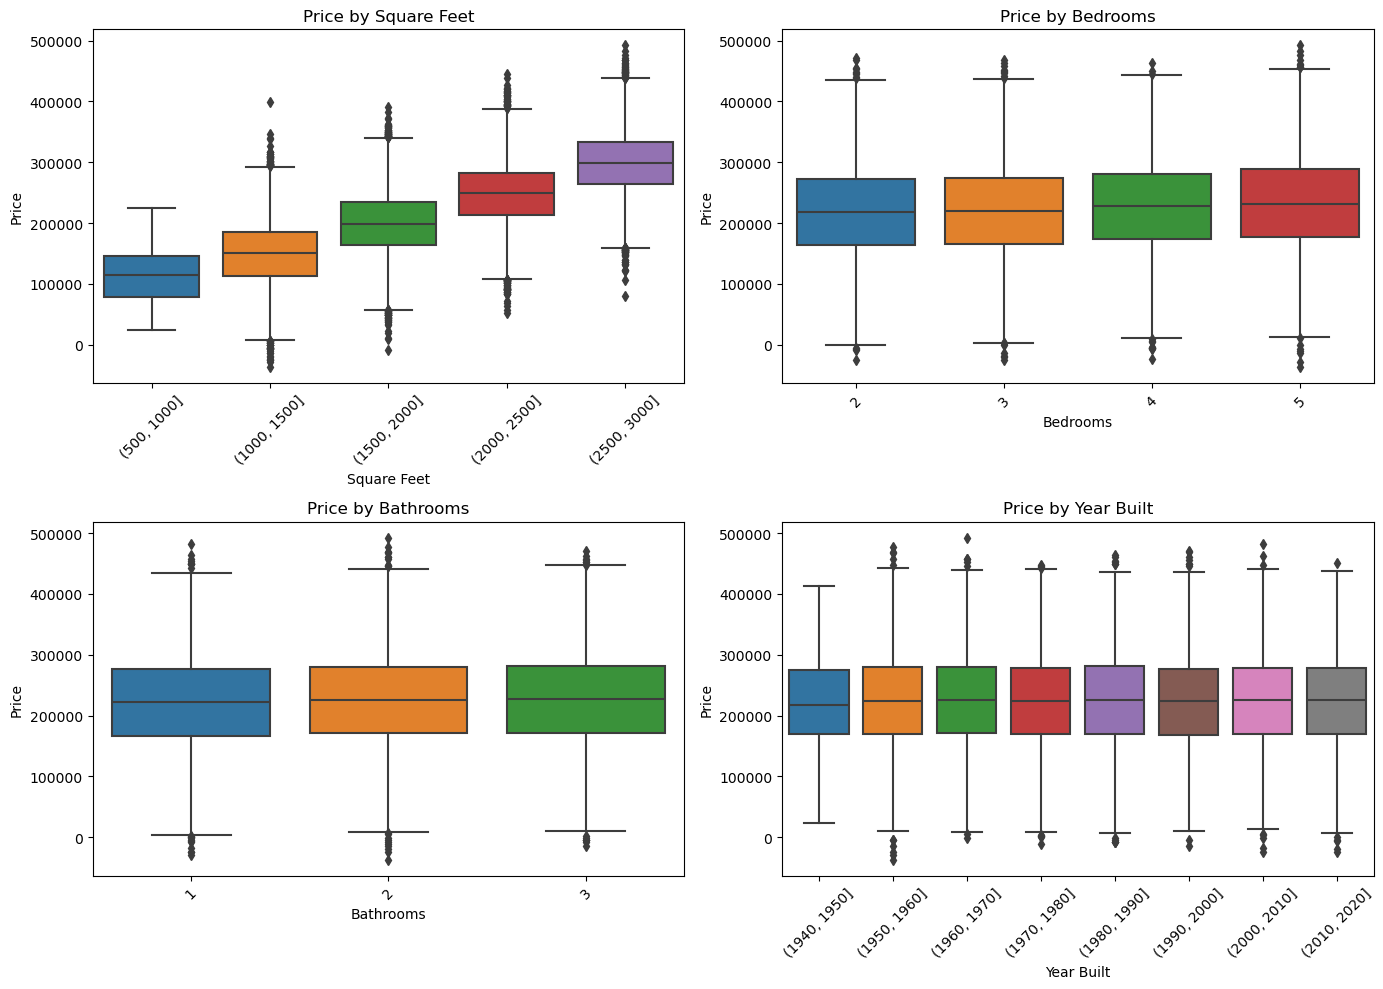

In [12]:
# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Boxplots
# Group SquareFeet before plotting
df['SquareFeet_Binned'] = pd.cut(df['SquareFeet'], bins=range(500, 3500, 500))

sns.boxplot(x=df['SquareFeet_Binned'], y=df['Price'], ax=axes[0, 0], )
axes[0, 0].set_title('Price by Square Feet')
axes[0, 0].set_xlabel('Square Feet')
axes[0, 0].set_ylabel('Price')
axes[0, 0].tick_params(axis='x', rotation=45)

sns.boxplot(x=df['Bedrooms'], y=df['Price'], ax=axes[0, 1])
axes[0, 1].set_title('Price by Bedrooms')
axes[0, 1].set_xlabel('Bedrooms')
axes[0, 1].set_ylabel('Price')
axes[0, 1].tick_params(axis='x', rotation=45)

sns.boxplot(x=df['Bathrooms'], y=df['Price'], ax=axes[1, 0])
axes[1, 0].set_title('Price by Bathrooms')
axes[1, 0].set_xlabel('Bathrooms')
axes[1, 0].set_ylabel('Price')
axes[1, 0].tick_params(axis='x', rotation=45)

# Group YearBuilt by decades
df['YearBuilt_Decade'] = pd.cut(df['YearBuilt'], bins=range(1940, 2030, 10))

sns.boxplot(x=df['YearBuilt_Decade'], y=df['Price'], ax=axes[1, 1])
axes[1, 1].set_title('Price by Year Built')
axes[1, 1].set_xlabel('Year Built')
axes[1, 1].set_ylabel('Price')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Preliminary Work on Machine Learning to Make Predictions
Evaluate learning with various machine learning modules using all the features that have a positive correlation with `Price`, which are `Squarefeet`, `Bedrooms`, and `Bathrooms`.

## Baseline

In [13]:
X = df[PREDICTORS]
y = df[TARGET]

# Split into training and test sets
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

# Baseline test RMSE for comparison
mean_price = y_train.mean()
baseline_predictions = np.full_like(y_test, mean_price)

# Compute and print baseline test RMSE
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_predictions))
print(f'Baseline test RMSE: {round(baseline_rmse, 2)}\n')

Baseline test RMSE: 13276.95



## K-Nearest Neighbors (KNN)

In [14]:
# Train model
knn_regressor = KNeighborsRegressor(algorithm='brute')
knn_regressor.fit(X_train, y_train)

# Make predictions
y_pred = knn_regressor.predict(X_test)

# Evaluate model
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
r2 = r2_score(y_test, y_pred)

print(f'KNN RMSE: {round(test_rmse, 2)}')
print(f'R-squared: {round(r2, 4)}')

KNN RMSE: 54360.64
R-squared: 0.4852


## Grid Search with Cross-Validation (KNN)

In [15]:
knn_regressor = KNeighborsRegressor(algorithm='brute')
param_grid = {'n_neighbors': [3, 5, 7, 9],
              'p': [1, 2],
              'weights': ['uniform', 'distance']}

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn_regressor, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# See best parameters
print(f'Best parameters: {grid_search.best_params_}')

# Get best model
best_knn = grid_search.best_estimator_

# Make predictions
knn_y_pred = best_knn.predict(X_test)

# Evaluate model
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_rmse = np.sqrt(knn_mse)
knn_r2 = r2_score(y_test, knn_y_pred)

print(f'KNN RMSE: {round(knn_rmse, 2)}')
print(f'R-squared: {round(knn_r2, 4)}')

Best parameters: {'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
KNN RMSE: 52220.65
R-squared: 0.5249


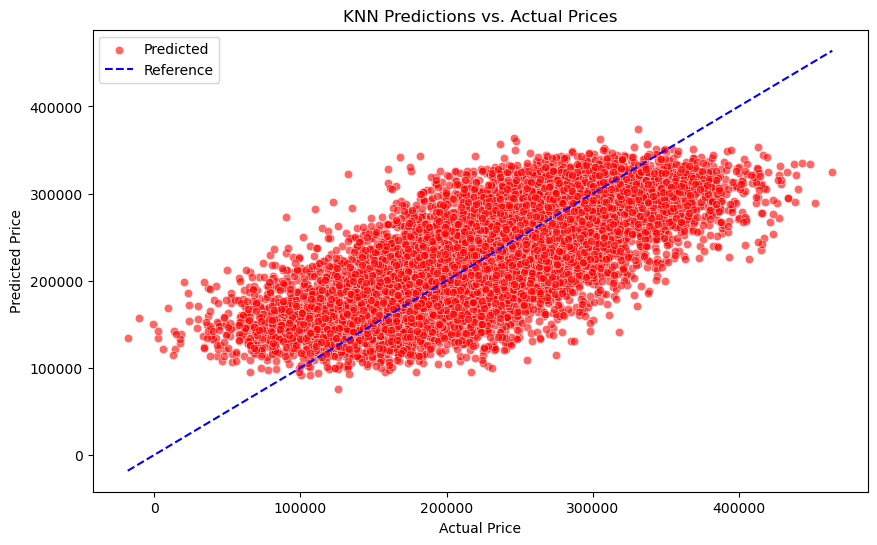

In [16]:
# Visualize KNN predictions vs. actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=knn_y_pred, alpha=0.6, color='red', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='--', label='Reference')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('KNN Predictions vs. Actual Prices')
plt.legend()
plt.show()

C:\Users\Brian\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Brian\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


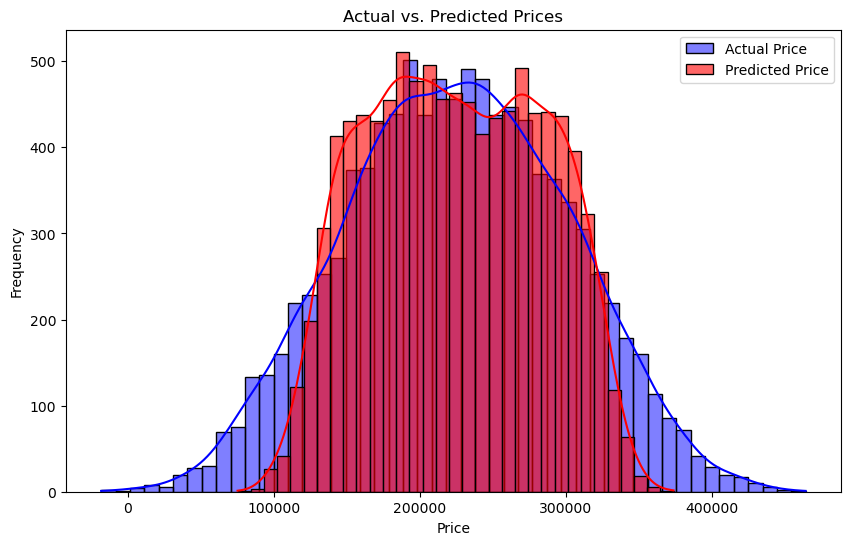

In [17]:
# Alternate visualization of KNN predictions vs. actual values
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='blue', label='Actual Price', kde=True)
sns.histplot(knn_y_pred, color='red', label='Predicted Price', kde=True, alpha=0.6)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.show()

## Linear Regression

In [18]:
# Train model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Make predictions
y_pred = linear_reg.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Linear Regression RMSE: {round(rmse, 1)}')
print(f'R-squared: {round(r2, 4)}')

Linear Regression RMSE: 49358.4
R-squared: 0.5756


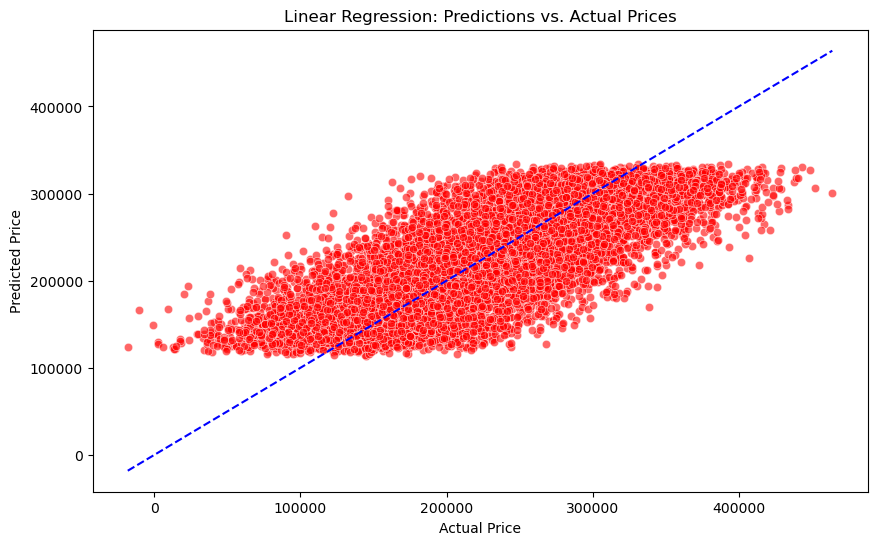

In [19]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='red')

# Reference line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='--')

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression: Predictions vs. Actual Prices')
plt.show()

## Cross-Validation with Linear Regression

In [20]:
# Train model
cv_linear_reg = LinearRegression()
cv_linear_reg.fit(X_train, y_train)

# Perform cross-validation on training set and compute negative MSE
cross_val_scores = -cross_val_score(cv_linear_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
cross_val_mse = cross_val_scores.mean()
cross_val_rmse = np.sqrt(cross_val_mse)

# Evaluate model
test_mse = mean_squared_error(y_test, cv_linear_reg.predict(X_test))
test_rmse = np.sqrt(test_mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f'CV RMSE (training set): {round(cross_val_rmse, 1)}')
print(f'R-squared: {round(r2, 4)}')

CV RMSE (training set): 50065.8
R-squared: 0.5756
